In [87]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

import math

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import mean_squared_error

In [88]:
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)

In [89]:
df = pd.DataFrame(abalone)

In [90]:
df.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [93]:
sex_le = LabelEncoder()
df["Sex"] = sex_le.fit_transform(df["Sex"])

In [94]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [95]:
X = np.array(df.drop("Rings", axis=1))
y = np.array(df["Rings"])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [97]:
knn = KNeighborsClassifier(n_neighbors=3)

In [102]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
y_pred = knn.predict(X_test)
y_pred

array([ 9,  8, 12, ...,  8,  9,  7], dtype=int64)

In [104]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse

2.6495162207744136

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 22.57%


In [106]:
print(f"Score for Test {knn.score(X_test, y_test)}")
print(f"Score for Train{knn.score(X_train, y_train)}")

Score for Test 0.22567783094098884
Score for Train0.5121450564488539


[]

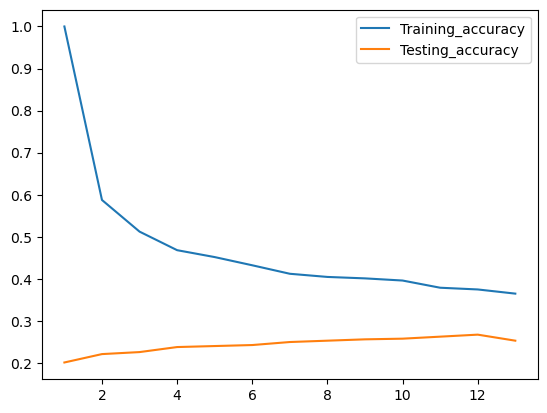

In [107]:
train_accuracy = []
test_accuracy = []
for i in range(1, 14):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

x = [i for i in range(1, 14)]
plt.plot(x, train_accuracy, label="Training_accuracy")
plt.plot(x, test_accuracy, label="Testing_accuracy")
plt.legend()
plt.plot()

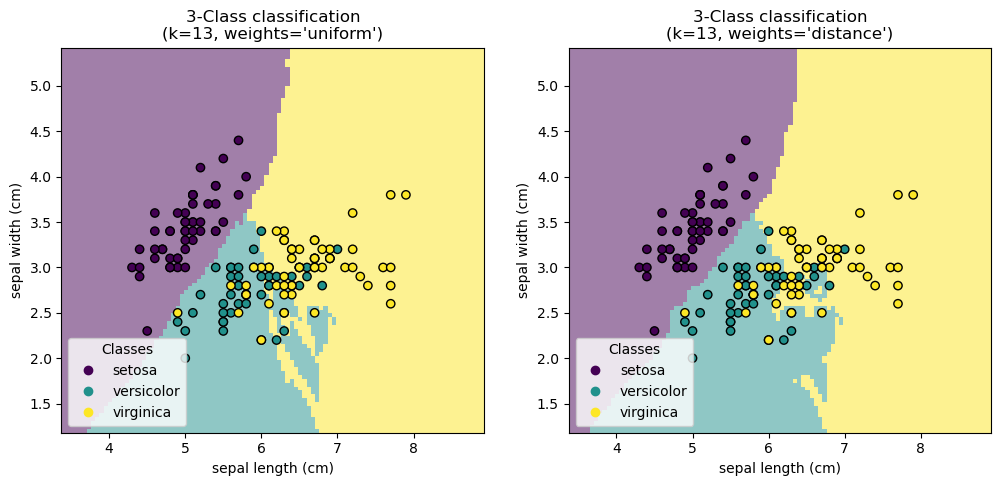

In [41]:
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    knn.set_params(weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        knn,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    disp.ax_.set_title(
        f"3-Class classification\n(k={knn.n_neighbors}, weights={weights!r})"
    )

plt.show()

<Figure size 1200x1000 with 0 Axes>

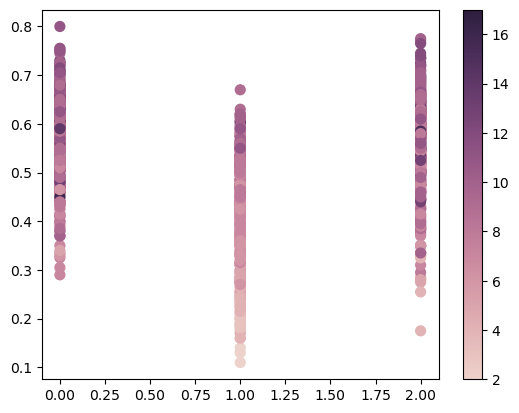

In [108]:
plt.figure(figsize=(12, 10))
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()